# 1. Určiť frekvenciu/periódu oscilácií.

# 2.   Určiť útlm (podiel po sebe idúcich peakov)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('RLC.csv')

In [4]:
t = df['t']
I = df['I']

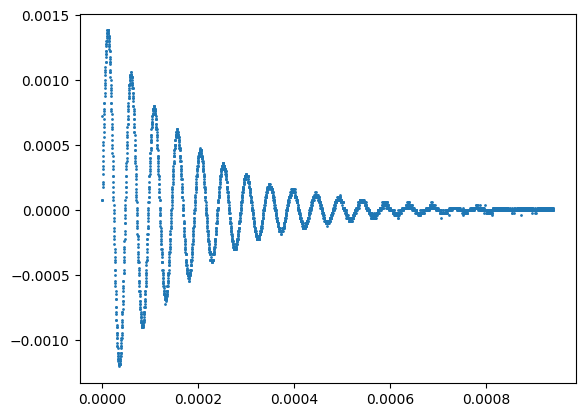

In [6]:
plt.scatter(t,I, s=1)

In [7]:
def norm(xi, mu, sigma):
        return(np.exp(-(xi-mu)**2/(2*sigma**2))/(sigma*(2*np.pi)**.5))

In [8]:
n = 41
x = np.linspace(-n/2, n/2, n)
uni = np.array([1/n]*n)
nor = norm(x, 0, n/6)
nor = nor/np.sum(nor)

In [17]:
np.sum(uni)

1.0

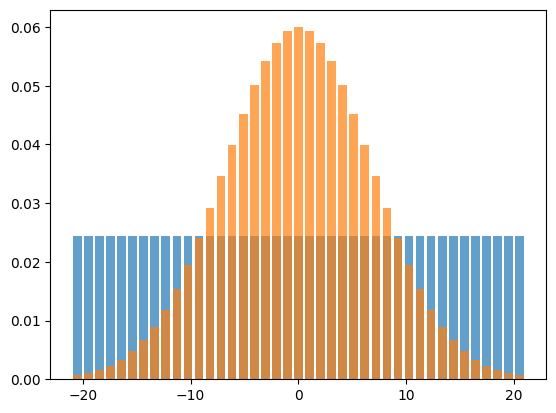

In [10]:
plt.bar(x, uni, alpha=0.7)
plt.bar(x, nor, alpha=0.7)
plt.show()

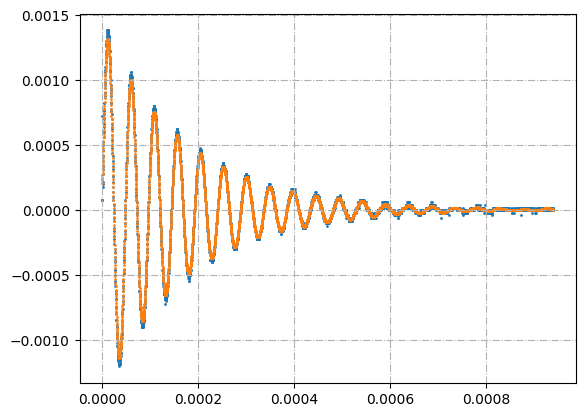

In [9]:
uI = np.convolve(I, uni)
uI = uI[int(np.floor(n/2)):-int(np.floor(n/2))]

plt.grid(which="both", linestyle='-.')
plt.scatter(t, I, s=1)
plt.scatter(t, uI, s=1)
plt.show()

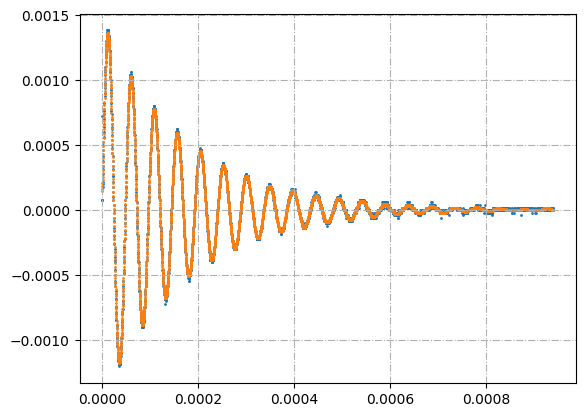

In [12]:
nI = np.convolve(I, nor)
nI = nI[int(np.floor(n/2)):-int(np.floor(n/2))]

plt.grid(which="both", linestyle='-.')
plt.scatter(t, I, s=1)
plt.scatter(t, nI, s=1)
plt.show()

In [27]:
dI = np.diff(nI)
dt = t[1]-t[0]

one_diff = dI/dt

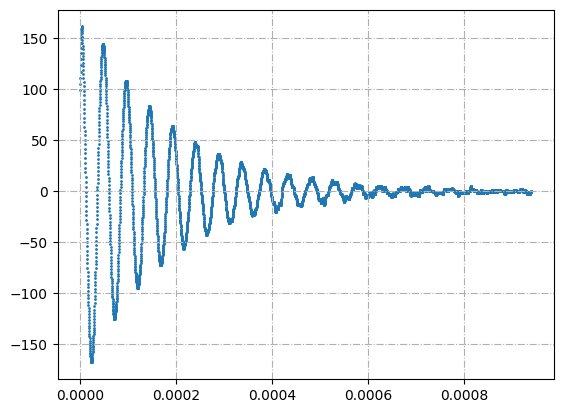

In [29]:
plt.grid(which="both", linestyle='-.')
plt.scatter(t[:-1], one_diff, s=1)
plt.show()

In [30]:
def extreme(xi, chi):
    if (xi==0) or (xi*chi < 0):
        return True
    else:
        return False

In [33]:
ext_loc = np.array([])

for i in range(1, len(one_diff)):
    if extreme(one_diff[i], one_diff[i-1]):
        ext_loc = np.append(ext_loc, i)
        i = i+15

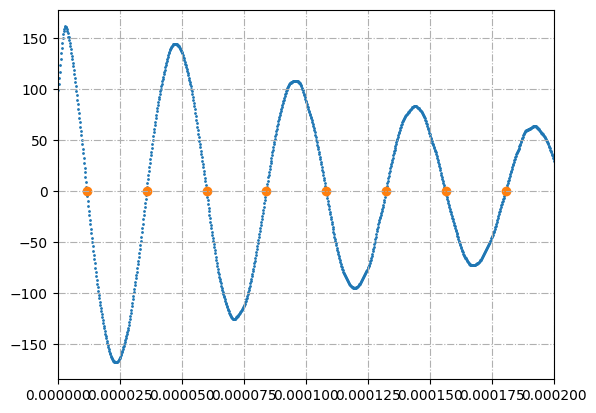

In [49]:
plt.grid(which="both", linestyle='-.')
plt.scatter(t[:-1], one_diff, s=1)
plt.scatter(t[ext_loc], [0]*len(ext_loc))
plt.xlim(0, 2e-4)
plt.show()

In [52]:
ext_loc = [int(xi) for xi in ext_loc]

In [39]:
period = np.diff(t[ext_loc[:24]])

In [43]:
avg_T = 2*np.average(period)

In [45]:
1/avg_T

20780.628839898807

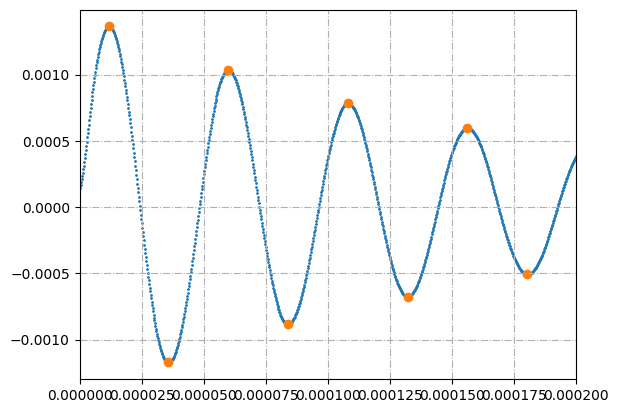

In [54]:
plt.grid(which="both", linestyle='-.')
plt.scatter(t, nI, s=1)
plt.scatter(t[ext_loc], nI[ext_loc])
plt.xlim(0, 2e-4)
plt.show()

In [58]:
diff_odd = np.array([])
diff_even = np.array([])

for i in range(2, 24):
    if i%2 == 0:
        diff_even = np.append(diff_even, nI[ext_loc[i]]/nI[ext_loc[i-2]])
    else:
        diff_odd = np.append(diff_odd, nI[ext_loc[i]]/nI[ext_loc[i-2]])    


In [61]:
damp = np.average(np.append(diff_even, diff_odd))

In [62]:
damp

0.7625870971727088